# Hello, Seaborn
With this I aim to take my data visualization to the next level with seaborn. Cheers to making faster, more attractive plots.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import numpy as np
from sklearn.preprocessing import LabelEncoder

### Reading data
pd.read_csv is used to read the data with 3 parameters:
- filepath: ```"tip.csv"``` where the file is stored
- ```index_col="Date"```: When we load the dataset, we want each entry in the first column to denote a different row. Todo this we set the value og index_col to the name of the first column
- ```parse_dates=True```: This tells the notebook to inderstand the each row label as a date

In [3]:
data= pd.read_csv('tip.csv')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


### Plotting a Distribution plot
Histograms are useful for cisualizing the distribution of a dataset. It can be done using ```distplot()``` function

C:\Users\poude\AppData\Local\Temp\ipykernel_1272\3735552591.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["total_bill"])


<Axes: xlabel='total_bill', ylabel='Density'>

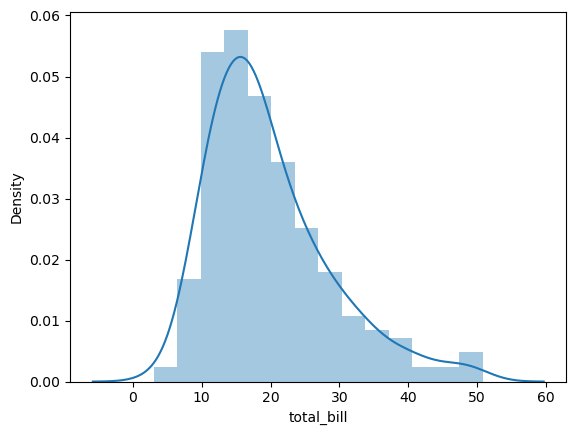

In [6]:
sns.distplot(data["total_bill"])

### Plotting a Histogram
It describes the distribution of data. It can be done usint ```histplot()```

##### Parameters
- 'x': Variable to be plotted in x axes
- 'data': DataFrame containing the data
- 'bins': Number of bins to use for binning the data
- 'kde': Whether to overlay a kernel density estimate (KDE) plot
- 'color','alpha': Color and transparency of the bars
- 'cumulative': WHether to ploat a cumulative histogram

<Axes: xlabel='tip', ylabel='Percent'>

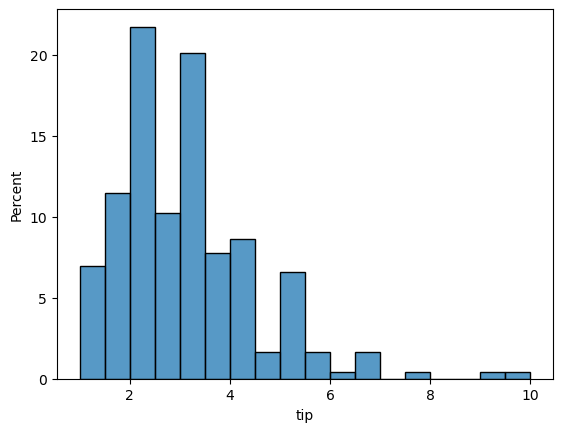

In [6]:
sns.histplot(data['tip'], stat='percent', multiple="stack")

### Plotting a kernal density estimate
KDEs are a way to estimate the probablity density function of a random variable. It is done using ```kdeplot()``` function.

<Axes: xlabel='total_bill', ylabel='Density'>

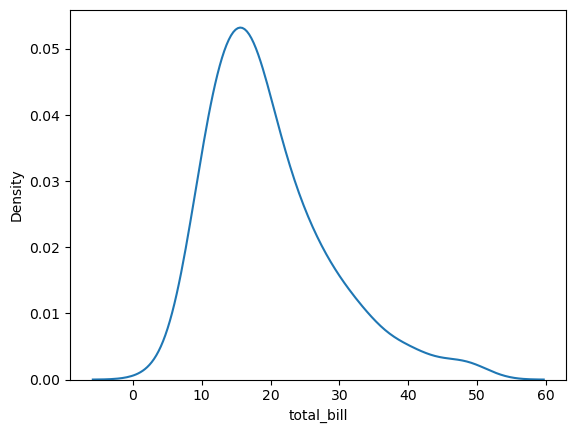

In [8]:
sns.kdeplot(data['total_bill'])

### Plotting a scatter plot
Scatter plots are useful for visualizing the relationship between two continous variable. Each single point represents a single obeservation in a dataset. It is done using ```scatterplot()``` function.

##### Parameters
- 'x' , 'y': Variables to be plotted in x and y axes
- 'data': DataFrame containing the data
- 'hue', 'size', 'style'
- 'palette': Color palette to use for coloring the points.
- 'aplha': Transparency of the points



<Axes: xlabel='total_bill', ylabel='tip'>

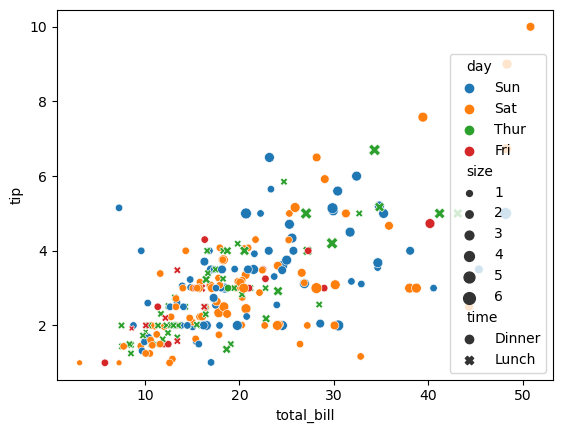

In [7]:
sns.scatterplot(data=data, x="total_bill", y="tip", hue="day", style="time", size="size")

In [10]:
# Encoding categorical features
le = LabelEncoder()

le.fit(data.sex.drop_duplicates())
data.sex= le.transform(data.sex)

le.fit(data.smoker.drop_duplicates())
data.smoker= le.transform(data.smoker)

### Plotting a line plot
Line plots are useful for visualizing trends over time or other continuous variable. It is done using ```lineplot()```.


##### Parameters
- 'x' , 'y': Variables to be plotted in x and y axes
- 'data': DataFrame containing the data
- 'hue', 'style'
- 'palette': Color palette to use for coloring the points.
- 'markers': Wheteher to plot markers at datapoints.
- 'ci': Confidence interval for bootstrapped confidence intercal around the estimate



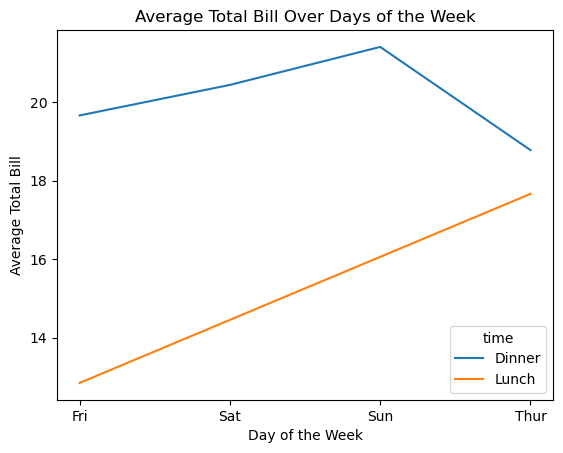

In [9]:
avg_tips = data.groupby(['day', 'time']).total_bill.mean().reset_index()

# Create line plot
sns.lineplot(data=avg_tips, x='day', y='total_bill', hue='time')

# Add plot title and labels
plt.title('Average Total Bill Over Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Total Bill')

# Show the plot
plt.show()

### Plotting a bar plot
Barplots are useful for visualizing categorical variables. It is done using ```countplot()```.

##### Parameters
- 'x' , 'y': Variables to be plotted in x and y axes
- 'data': DataFrame containing the data
- 'hue', 'style'
- 'palette': Color palette to use for coloring the points.
- 'estimator': Function to estimate the central tendency of the data within each category (eg: mean, median)
- 'ci': Confidence interval for bootstrapped confidence intercal around the estimate

<Axes: xlabel='time', ylabel='count'>

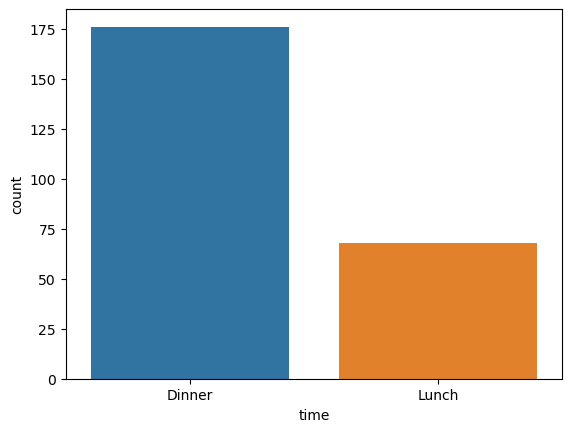

In [12]:
sns.countplot(x='time',data=data)

### Plotting a heat map
Heat maps are useful for visualizing the relationships between two categorical variables. It can be done using ```heatmap()```. Used to visualize the matrix of values by representing each value as a color.

##### Parameters
- 'data': DataFrame containing the data
- 'cmap': Colormap to use for mapping values to colors
- 'annot': WHether to annotate each cell with the numeric value
- 'linewidth', 'linecolor': Width and color of the lines dividing each cell.


In [13]:
data.describe()

,total_bill,tip,sex,smoker,size
count,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,0.643443,0.381148,2.569672
std,8.902412,1.383638,0.479967,0.486667,0.951100
min,3.070000,1.000000,0.000000,0.000000,1.000000
25%,13.347500,2.000000,0.000000,0.000000,2.000000
50%,17.795000,2.900000,1.000000,0.000000,2.000000
75%,24.127500,3.562500,1.000000,1.000000,3.000000
max,50.810000,10.000000,1.000000,1.000000,6.000000


<Axes: >

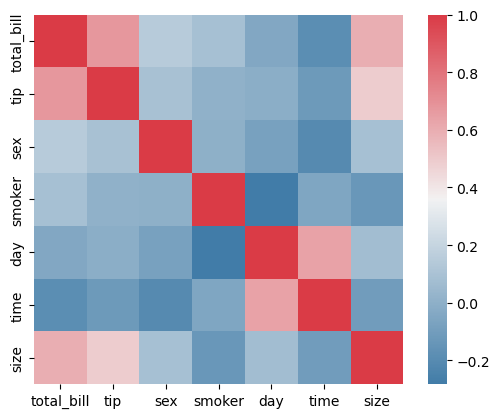

In [14]:
le.fit(data.day.drop_duplicates())
data.day= le.transform(data.day)

le.fit(data.time.drop_duplicates())
data.time= le.transform(data.time)

data.corr()['tip'].sort_values()

corr= data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), 
            cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True)

### Plotting a box plot
Box plots are useful for visualizing the distribution of a dataset and detecting outlies. It can be done using ```boxplot```.

##### Parameters
- 'x' , 'y': Variables to be plotted in x and y axes
- 'data': DataFrame containing the data
- 'hue'
- 'palette': Color palette to use for coloring the points.
- 'whis': Proportion of the IQR to extend the plot whiskers

<Axes: xlabel='day', ylabel='total_bill'>

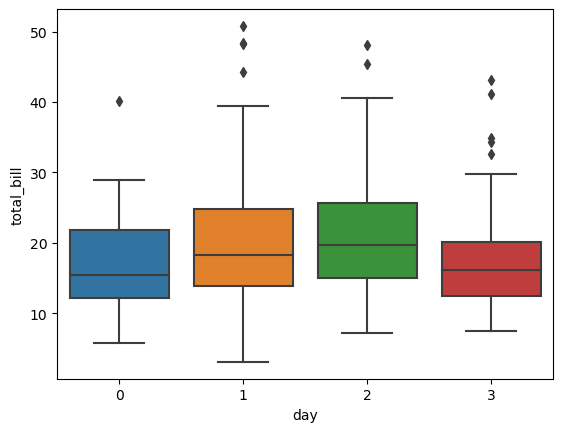

In [15]:
sns.boxplot(x="day", y="total_bill", data=data)

### Plotting a violin plot
Violin plots are similar to box plots, but they show the probability density of the data at different values. It can be done using ```violinplot()```. It combines the feature of box plots and Kernel density estimates(KDE).

##### Parameters
- 'x' , 'y': Variables to be plotted in x and y axes
- 'data': DataFrame containing the data
- 'hue'
- 'palette': Color palette to use for coloring the points.
- 'split': Whether to split the violins when using hue

<Axes: xlabel='day', ylabel='total_bill'>

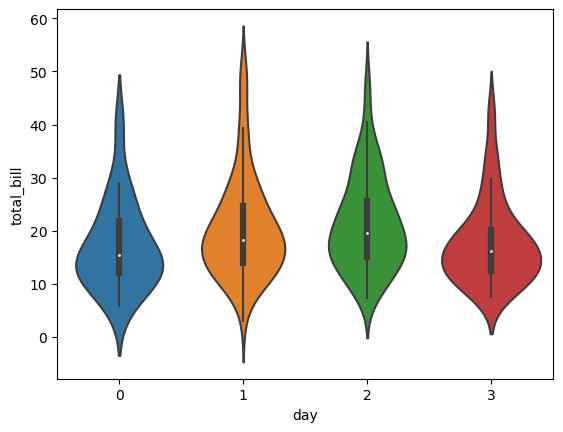

In [16]:
sns.violinplot(x='day', y='total_bill', data=data)

### Plotting a pair plot
They are useful for visualizing the relationships between multiple variables in a dataset. It can be done using ```pairplot()```. Pairwise relationships between different varibles in a dataset.

##### Parameters
- 'data': DataFrame containing the data
- 'hue', 'style'
- 'palette': Color palette to use for coloring the points.
- 'markers': Marker styles for scatterplot

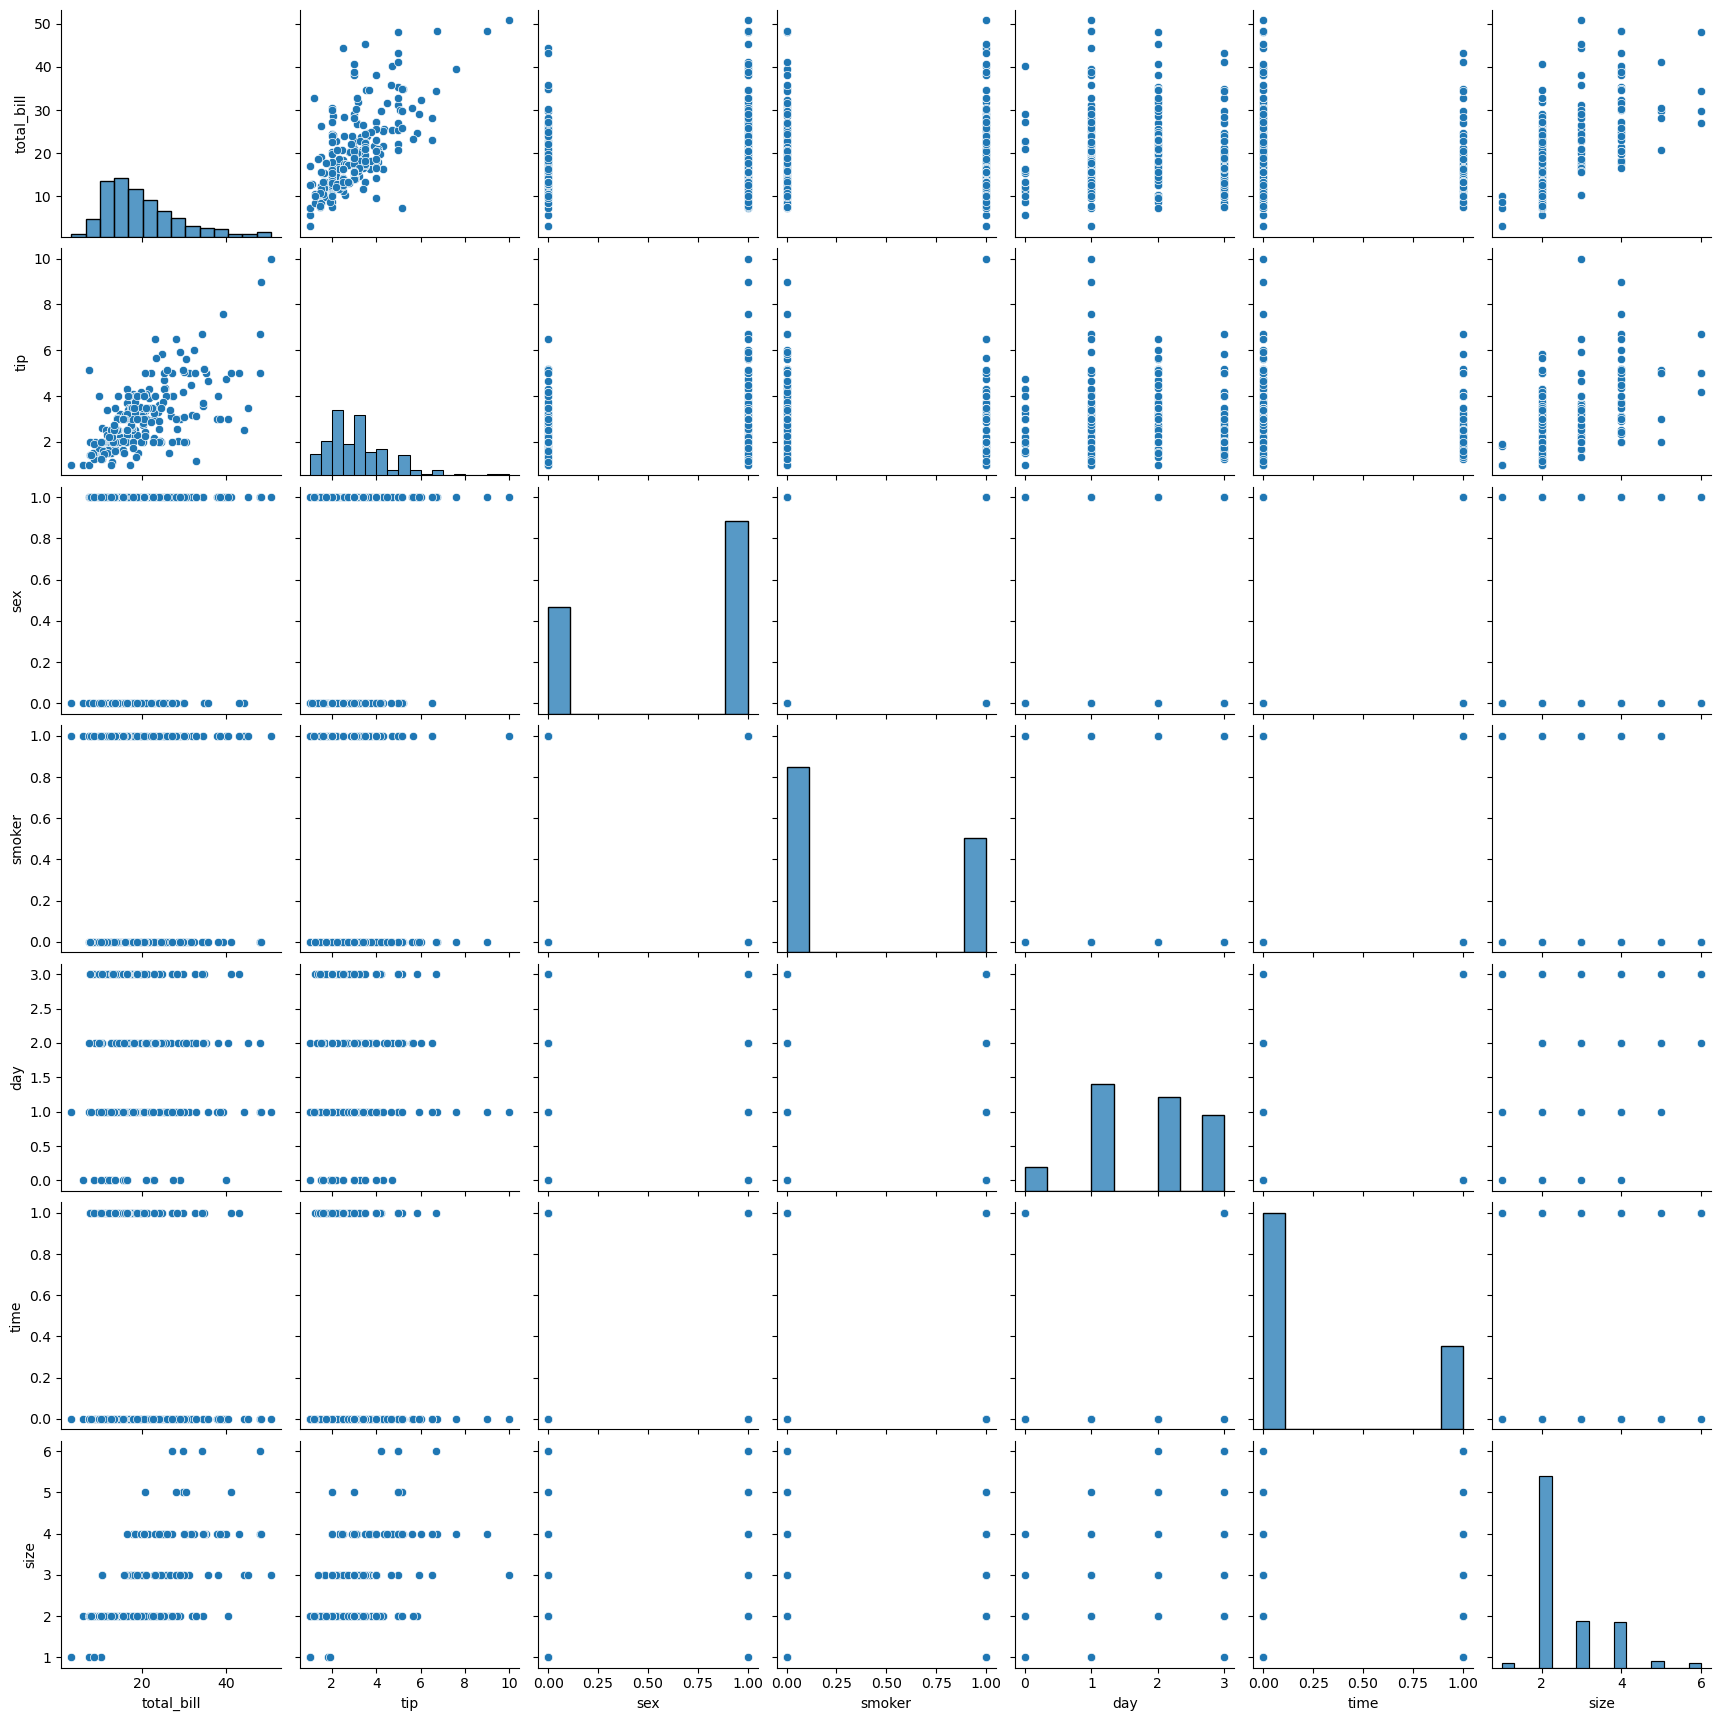

In [17]:
sns.pairplot(data)

### Plotting a Joint Plot
Joint plots are useful for visualizing the relationshop between two variables and their individual distribution. It can be done using ```jointplot()```.

##### Parameters
- 'x' , 'y': Variables to be plotted in x and y axes
- 'data': DataFrame containing the data
- 'hue, 'palette'
- 'kind': Tye of plot to draw ('scatter', 'kde', 'hist', 'hex')
- 'stat_func': Function used to estimate a statistic (e.g np.mean, np.median)


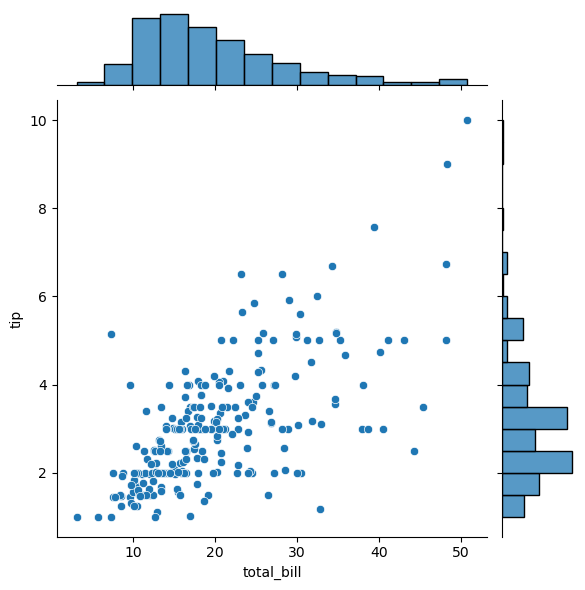

In [18]:
sns.jointplot(x="total_bill", y="tip", data=data)